In [6]:
import numpy as np
import pandas as pd
# from word2number import w2n
import re

In [216]:
df = pd.read_csv('../csv-archivos/HR RAW DATA.csv', index_col=0)

In [4]:
#Columna Age

In [5]:
def word_to_num(dato):
    
    if len(dato) > 2:
        dato = w2n.word_to_num(dato)
        return dato

    else:
        return dato

In [6]:
df['Age'] = df['Age'].apply(word_to_num)

In [7]:
#Attrition

In [8]:
def true_false(valor):
   
    if valor in ['Yes', 'yes', '1', 'Y']:
        valor = True
    
    elif valor in ['False', 'No', '0', 'false']:
        valor = False
    

    else:
        valor = np.nan

    return valor


In [9]:
lista_bool = ['Attrition', 'RemoteWork', "Over18" , 'OverTime']

for columna in lista_bool:
    df[columna] = df[columna].apply(true_false)

In [10]:
#Business Travel

In [11]:
df['BusinessTravel'] = df['BusinessTravel'].map({"non-travel":"no", "travel_rarely":"rarely", "travel_frequently":"frequently"})

In [12]:
#Daily Rate

In [44]:
lista_float =  ['Age', 'employeenumber', 'PerformanceRating', 'StandardHours', 'TOTALWORKINGYEARS', 'Salary', 'YearsInCurrentRole', 'SameAsMonthlyIncome', 'DailyRate', 'WORKLIFEBALANCE', 'MonthlyIncome']

In [45]:
def to_float(valor):
    try:
        if type(valor) != str or np.nan:
            str(valor)
        
            
        if '$' in valor:
            valor = valor.replace('$', '')
        elif '%' in valor:
            valor = valor.replace('%', '')
        return float(valor.replace(",", "."))
        
    
    except:
        
        return np.nan

In [46]:
for columna in lista_float:

    df[columna] = df[columna].apply(to_float)

In [47]:
df['Age'].dtypes

dtype('float64')

In [16]:
#Distance From Home

In [17]:
df["DistanceFromHome"] = abs(df["DistanceFromHome"])

In [18]:
#employeecount

In [19]:
df.drop(['employeecount', 'NUMBERCHILDREN'], axis=1, inplace=True)

## ISA

In [20]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('marreid', 'married')


df['Gender'] = df['Gender'].map({1: "F", 0: 'M'})

In [21]:
df['HourlyRate'] = df['HourlyRate'].replace('Not Available', np.nan)

## MIRNA

In [22]:
df["PercentSalaryHike"] = (df["PercentSalaryHike"]).astype(float) / 100

## JOHANNA

In [23]:


# eliminamos el role job
lista_vacia = []

for dato in df['RoleDepartament']:
    dato = str(dato)
    if '-' in dato:
        dato = dato.split('- ')
        lista_vacia.append(dato[-1].strip())
    else:
        lista_vacia.append(dato)


# volcamos datos nuevos
df['RoleDepartament'] = lista_vacia

HOMOGENIZAR COLUMNAS

In [ ]:
df

In [25]:
#creo una nueva lista para apendear los nuevos nombres
col = []
patron = re.compile(r'[a-zA-Z][a-z]*[A-Z][a-z]*') #patron que busca minusculas y mayusculas seguidas
for columna in df.columns: #itero por la lista 
    if re.search(patron, columna):
        col_sep = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', columna) #cada vez que encuentro una minúscula seguida de mayúscula lo cambio por _ 
        col.append(col_sep.lower())
    else:
        col.append(columna.lower())

In [ ]:
col

In [27]:
df.shape

(1614, 39)

In [28]:
nuevas_columnas = ['age',
 'attrition',
 'business_travel',
 'daily_rate',
 'department',
 'distance_from_home',
 'education',
 'education_field',
 'employee_number',
 'environment_satisfaction',
 'gender',
 'hourly_rate',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'monthly_income',
 'monthly_rate',
 'num_companies_worked',
 'over18',
 'over_time',
 'percent_salary_hike',
 'performance_rating',
 'relationship_satisfaction',
 'standard_hours',
 'stock_option_level',
 'total_workin_gyears',
 'training_times_last_year',
 'work_life_balance',
 'years_at_company',
 'years_in_current_role',
 'years_since_last_promotion',
 'years_with_curr_manager',
 'same_as_monthly_income',
 'date_birth',
 'salary',
 'role_departament',
 'remote_work']

In [29]:
len(col)

39

In [30]:
len(nuevas_columnas)

39

In [ ]:
dicc = {}

for indice, valor in zip(df.columns, nuevas_columnas):
    dicc[indice] = valor

dicc

In [32]:
df.rename(columns=dicc, inplace=True)

In [33]:
df.to_csv('df_limpio.csv')

In [ ]:
df_limpio = pd.read_csv('df_limpio.csv', index_col=0)
df_limpio

In [ ]:
(df.isnull().sum()/df.shape[0])*100

In [36]:
df['age'].dtypes

dtype('O')

# DUPLICADOS

In [49]:
df = pd.read_csv('../csv-archivos/datos_limpios.csv', index_col=0)

In [57]:
filas_duplicadas = df[df.duplicated()]

In [ ]:
filas_duplicadas

In [54]:
dfcopy = df.copy()

In [61]:
df.drop_duplicates(inplace=True)

In [ ]:
for col in df.columns:
    print

columnas no duplicados:
- employee_number (con pinzas)

In [63]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

In [ ]:
df['hourly_rate'] * df['standard_hours']

In [ ]:
df['daily_rate'] / df['hourly_rate']

In [ ]:
df['standard_hours']

In [ ]:
df[['monthly_income', 'daily_rate', 'hourly_rate', 'monthly_rate']]

Observaciones individuales 
1- "same_as_monthly_income" y "monthly_income", son iguales. Eliminar una de las dos, salary es un valor constante no nos aporta nada
2- Analizamos el salario mensual contamos con el 47% de los datos los demas son nulos. Existe una gran variabilidad en los ingresos de los empleados entre 1009 y 19.999(desviación 4.766.11)
Tiene una media de 6.477,66, mediana de 4.859 el salario minimo es 1.009, el maximo 19.999, el 75% esta por debajo de 8.2230 , el 25% por debajo de 2.880. 
3- Analizamos el porcentaje de aumento salarial : hay una variedad de incrementos salariales entre los empleados, con un promedio de alrededor del 15.17% y una desviación estándar moderada de aproximadamente 3.65%.
Valores mínimos y máximos (Min y Max): El porcentaje mínimo de aumento salarial registrado es del 11%, mientras que el máximo es del 25%.
El 25% de los empleados tienen un aumento salarial del 12% o menos, el 50% tienen un aumento del 14% o menos, y el 75% tienen un aumento del 18% o menos.
4- # Relación entre el ingreso mensual 'monthly_income'  y la tasa mensual 'monthly_rate', es casi horizontal asi que no hay una relación directa solo que al aumentar el ingreso tambien la tasa
5- # No existe relacion considerable entre el ingreso mensual  y el % de aumento salarial
6- La columna daily rate da la impresión de ser la cantidad real que gana un empleado por dia, contamos con el 92% de los datos numericos y además es la unica columna que en principio tenía el simbolo de $.  Los valores varían considerablemente, lo que indica que hay una diversidad en los niveles salariales diarios entre los empleados.

    
7- La columna "hourly_rate", indica que hay una gran variabilidad en el valor asignado a cada empleado. Contamos con el 94% de los datos.

In [232]:
df = pd.read_csv('../csv-archivos/datos_limpios.csv')

In [ ]:
df.head()

In [233]:
datos_sueldo = df[[
    "daily_rate",
    "hourly_rate",
    "same_as_monthly_income",
    "salary",
    "percent_salary_hike",
    "monthly_income",
    "monthly_rate"
]]

In [ ]:
datos_sueldo

In [234]:
datos_sueldo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   daily_rate              1490 non-null   float64
 1   hourly_rate             1530 non-null   float64
 2   same_as_monthly_income  771 non-null    float64
 3   salary                  1614 non-null   float64
 4   percent_salary_hike     1614 non-null   float64
 5   monthly_income          771 non-null    float64
 6   monthly_rate            1614 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 88.4 KB


In [157]:
# 1. Verificamos si son iguales de varias maneras
diferencia = df[df["same_as_monthly_income"] - df["monthly_income"] == 0]

In [ ]:
diferencia

In [162]:
diferencia2 = df[df["same_as_monthly_income"] - df["monthly_income"] != 0]

In [ ]:
diferencia2

In [137]:
son_iguales = df['same_as_monthly_income'].equals(df['monthly_income'])

In [138]:
son_iguales

True

In [ ]:
# Inicializar contador de diferencias y de valores nulos
diferencias = 0
valores_nulos = 0

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    same_as_monthly = row['same_as_monthly_income']
    monthly_income = row['monthly_income']
    
    # Verificar si los valores son diferentes
    if same_as_monthly != monthly_income:
        diferencias += 1
        print(f"Diferencia en la fila {index}: same_as_monthly_income = {same_as_monthly}, monthly_income = {monthly_income}")
    
    # Verificar si hay valores nulos en alguna de las dos columnas
    if pd.isnull(same_as_monthly) or pd.isnull(monthly_income):
        valores_nulos += 1
        print(f"Valores nulos en la fila {index}: same_as_monthly_income = {same_as_monthly}, monthly_income = {monthly_income}")

# Imprimir resultados
print(f"Total de diferencias encontradas: {diferencias}")
print(f"Total de filas con valores nulos: {valores_nulos}")

In [187]:
datos_sueldo1 = df[[
    "daily_rate",
    "hourly_rate",    
    "percent_salary_hike",
    "monthly_income",
    "monthly_rate"
]]

In [235]:
datos_sueldo1

,daily_rate,hourly_rate,percent_salary_hike,monthly_income,monthly_rate
0,684.0,51.0,0.13,19537.0,6462
1,699.0,65.0,0.14,19999.0,5678
2,532.0,58.0,0.11,19232.0,4933
3,359.0,82.0,0.19,17169.0,26703
4,1319.0,45.0,0.12,NaN,7739
...,...,...,...,...,...
1609,530.0,51.0,0.11,10325.0,5518
1610,805.0,57.0,0.12,4447.0,23163
1611,903.0,41.0,0.18,NaN,2560
1612,1229.0,84.0,0.13,NaN,25952


In [236]:
datos_sueldo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   daily_rate           1490 non-null   float64
 1   hourly_rate          1530 non-null   float64
 2   percent_salary_hike  1614 non-null   float64
 3   monthly_income       771 non-null    float64
 4   monthly_rate         1614 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [237]:
datos_sueldo1.describe()

,daily_rate,hourly_rate,percent_salary_hike,monthly_income,monthly_rate
count,1490.000000,1530.000000,1614.000000,771.000000,1614.000000
mean,802.085235,66.028105,0.151654,6477.686122,14284.495663
std,403.246954,20.185954,0.036486,4766.119959,7110.414585
min,103.000000,30.000000,0.110000,1009.000000,2094.000000
25%,468.250000,48.000000,0.120000,2880.000000,8001.000000
50%,798.000000,66.000000,0.140000,4859.000000,14248.500000
75%,1157.000000,84.000000,0.180000,8230.500000,20364.000000
max,1499.000000,100.000000,0.250000,19999.000000,26999.000000


In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

2 - Analizamos el salario mensual contamos con el 47% de los datos los demas son nulos. Existe una gran variabilidad en los ingresos de los empleados entre 1009 y 19.999(desviación 4.766.11)
Tiene una media de 6.477,66, mediana de 4.859 el salario minimo es 1.009, el maximo 19.999, el 75% esta por debajo de 8.2230 , el 25% por debajo de 2.880. 

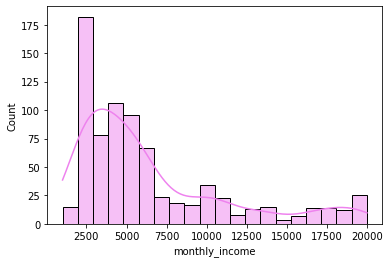

In [239]:
# Distribución de acuerdo a salario mensual
sns.histplot(x = "monthly_income", 
             data =df, 
             color = "violet", 
             kde = True,
             bins = 20 );

(0.0, 20000.0)

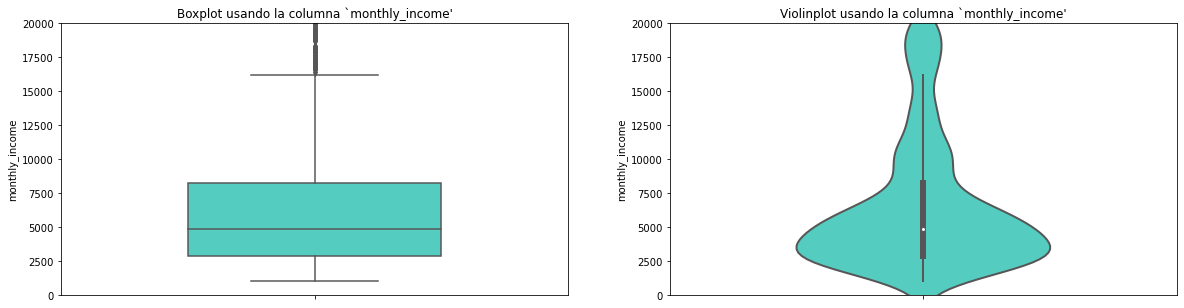

In [240]:
# empezamos creando el subplot con el número de gráficas deseadas en su interior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# añadimos un boxplot usando el método 'sns.boxplot()'
sns.boxplot(y = "monthly_income", 
            data = df, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("Boxplot usando la columna `monthly_income'")


# CREAMOS EL VIOLINPLOT USANDO SEABORN
# añadimos un violinplot usando el método 'sns.violinplot()'. COMO ES SEABORN, USAMOS EL PARÁMETRO 'ax' PARA INDICAR EN QUE EJE DE LA FIGURA LO QUEREMOS 
sns.violinplot(y = "monthly_income", 
               data = df, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2, 
               ax = axes[1])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[1].set_title("Violinplot usando la columna `monthly_income'")


# como ya sabemos que tenemos muchos outliers, vamos a usar el método '.set_ylim()' para "eliminar" los valores atípicos de la visualización
axes[0].set_ylim([0,20000])
axes[1].set_ylim([0,20000])

3. Analizamos el porcentaje de aumento salarial : hay una variedad de incrementos salariales entre los empleados, con un promedio de alrededor del 15.17% y una desviación estándar moderada de aproximadamente 3.65%.
Valores mínimos y máximos (Min y Max): El porcentaje mínimo de aumento salarial registrado es del 11%, mientras que el máximo es del 25%.
El 25% de los empleados tienen un aumento salarial del 12% o menos, el 50% tienen un aumento del 14% o menos, y el 75% tienen un aumento del 18% o menos.

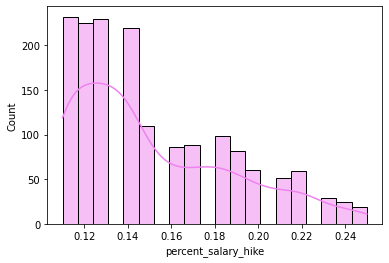

In [241]:
# Distribución de acuerdo a porcentaje de aumento salarial
sns.histplot(x = "percent_salary_hike", 
             data =df, 
             color = "violet", 
             kde = True,
             bins = 20 );



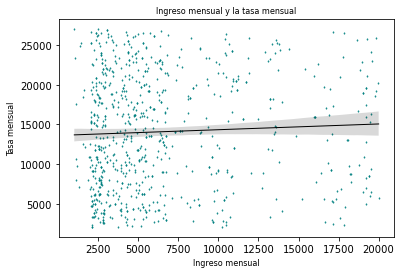

In [208]:
4. # Relación entre el ingreso mensual y la tasa mensual, es casi horizontal asi que no hay una relación directa solo que al aumentar el ingreso tambien la tasa
sns.regplot(x = "monthly_income", 
            y = "monthly_rate", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Ingreso mensual", fontsize = 8)
plt.ylabel("Tasa mensual", fontsize = 8)

# ponemos título a la gráfica
plt.title("Ingreso mensual y la tasa mensual", fontsize = 8);

In [ ]:
# Seguimos buscando relación entre estas variables 
datos_sueldo1["ratio"] = datos_sueldo1["monthly_income"] / datos_sueldo1["monthly_rate"]

In [247]:
datos_sueldo1.describe()

,daily_rate,hourly_rate,percent_salary_hike,monthly_income,monthly_rate,ratio
count,1490.000000,1530.000000,1614.000000,771.000000,1614.000000,771.000000
mean,802.085235,66.028105,0.151654,6477.686122,14284.495663,0.672283
std,403.246954,20.185954,0.036486,4766.119959,7110.414585,0.819032
min,103.000000,30.000000,0.110000,1009.000000,2094.000000,0.037372
25%,468.250000,48.000000,0.120000,2880.000000,8001.000000,0.223792
50%,798.000000,66.000000,0.140000,4859.000000,14248.500000,0.407999
75%,1157.000000,84.000000,0.180000,8230.500000,20364.000000,0.770353
max,1499.000000,100.000000,0.250000,19999.000000,26999.000000,7.806381


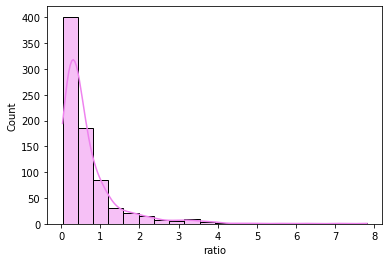

In [249]:
# Distribución de acuerdo "monthly_income"/'monthly_rate'
sns.histplot(x = "ratio", 
             data =datos_sueldo1, 
             color = "violet", 
             kde = True,
             bins = 20 );

(0.0, 2.0)

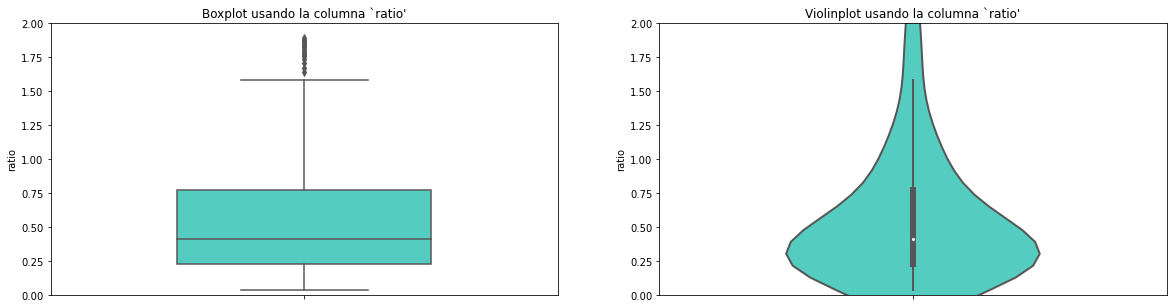

In [255]:
# empezamos creando el subplot con el número de gráficas deseadas en su interior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# añadimos un boxplot usando el método 'sns.boxplot()'
sns.boxplot(y = "ratio", 
            data = datos_sueldo1, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("Boxplot usando la columna `ratio'")


# CREAMOS EL VIOLINPLOT USANDO SEABORN
# añadimos un violinplot usando el método 'sns.violinplot()'. COMO ES SEABORN, USAMOS EL PARÁMETRO 'ax' PARA INDICAR EN QUE EJE DE LA FIGURA LO QUEREMOS 
sns.violinplot(y = "ratio", 
               data = datos_sueldo1, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2, 
               ax = axes[1])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[1].set_title("Violinplot usando la columna `ratio'")


# como ya sabemos que tenemos muchos outliers, vamos a usar el método '.set_ylim()' para "eliminar" los valores atípicos de la visualización
axes[0].set_ylim([0,2])
axes[1].set_ylim([0,2])

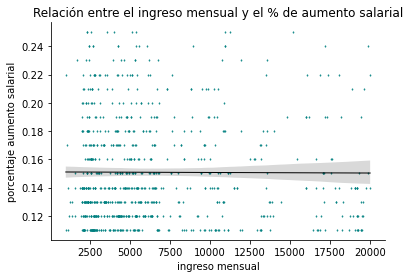

In [256]:
# No existe relacion considerable entre el ingreso mensual  y el % de aumento salarial
sns.regplot(x = "monthly_income", 
            y = "percent_salary_hike", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("ingreso mensual")
plt.ylabel("porcentaje aumento salarial")

# ponemos título a la gráfica
plt.title("Relación entre el ingreso mensual y el % de aumento salarial")

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

"daily_rate",
    "hourly_rate",
    "same_as_monthly_income",
    "salary",
    "percent_salary_hike",
    "monthly_income",
    "monthly_rate"

In [ ]:
# Seguimos buscando relación entre estas variables, consideramos que se trabajan 40 horas a la semana 20 dias al mes y que la tasa mensual se suma al salario final

datos_sueldo1["salario_mes_daily_rate"] = (datos_sueldo1["daily_rate"]*20 + datos_sueldo1["monthly_rate"])
datos_sueldo1

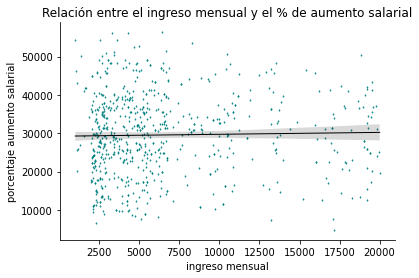

In [292]:
# No existe relacion considerable entre el ingreso mensual  y el % de aumento salarial parece que no tienen gran relación
sns.regplot(x = "monthly_income", 
            y = "salario_mes_daily_rate", 
            data = datos_sueldo1, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("ingreso mensual")
plt.ylabel("porcentaje aumento salarial")

# ponemos título a la gráfica
plt.title("Relación entre el ingreso mensual y el % de aumento salarial")

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

In [298]:
datos_sueldo1["salario_mes_daily_rate%"] =100*((datos_sueldo1["daily_rate"]*20 + datos_sueldo1["monthly_rate"])-datos_sueldo1["monthly_income"])/datos_sueldo1["monthly_income"]
datos_sueldo1["salario_mes_daily_rate%"]

/tmp/ipykernel_8178/3164288646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_sueldo1["salario_mes_daily_rate%"] =100*((datos_sueldo1["daily_rate"]*20 + datos_sueldo1["monthly_rate"])-datos_sueldo1["monthly_income"])/datos_sueldo1["monthly_income"]


0         3.096688
1        -1.705085
2       -19.025582
3        97.349875
4              NaN
           ...    
1609     56.106538
1610    782.909827
1611           NaN
1612           NaN
1613    227.597971
Name: salario_mes_daily_rate%, Length: 1614, dtype: float64

In [297]:
datos_sueldo1.describe()

,daily_rate,hourly_rate,percent_salary_hike,monthly_income,monthly_rate,ratio,salario_mes_daily_rate,salario_mes_daily_rate%
count,1490.000000,1530.000000,1614.000000,771.000000,1614.000000,771.000000,1490.000000,704.000000
mean,802.085235,66.028105,0.151654,6477.686122,14284.495663,0.672283,30285.706711,592.645497
std,403.246954,20.185954,0.036486,4766.119959,7110.414585,0.819032,10623.080296,535.758270
min,103.000000,30.000000,0.110000,1009.000000,2094.000000,0.037372,4777.000000,-72.184698
25%,468.250000,48.000000,0.120000,2880.000000,8001.000000,0.223792,22845.250000,219.461217
50%,798.000000,66.000000,0.140000,4859.000000,14248.500000,0.407999,30617.000000,466.102381
75%,1157.000000,84.000000,0.180000,8230.500000,20364.000000,0.770353,37681.750000,842.087987
max,1499.000000,100.000000,0.250000,19999.000000,26999.000000,7.806381,56382.000000,5275.520317


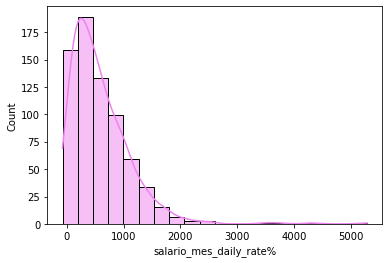

In [299]:
# Distribución de acuerdo a salario mensual
sns.histplot(x = "salario_mes_daily_rate%", 
             data =datos_sueldo1, 
             color = "violet", 
             kde = True,
             bins = 20 );

(0.0, 50.0)

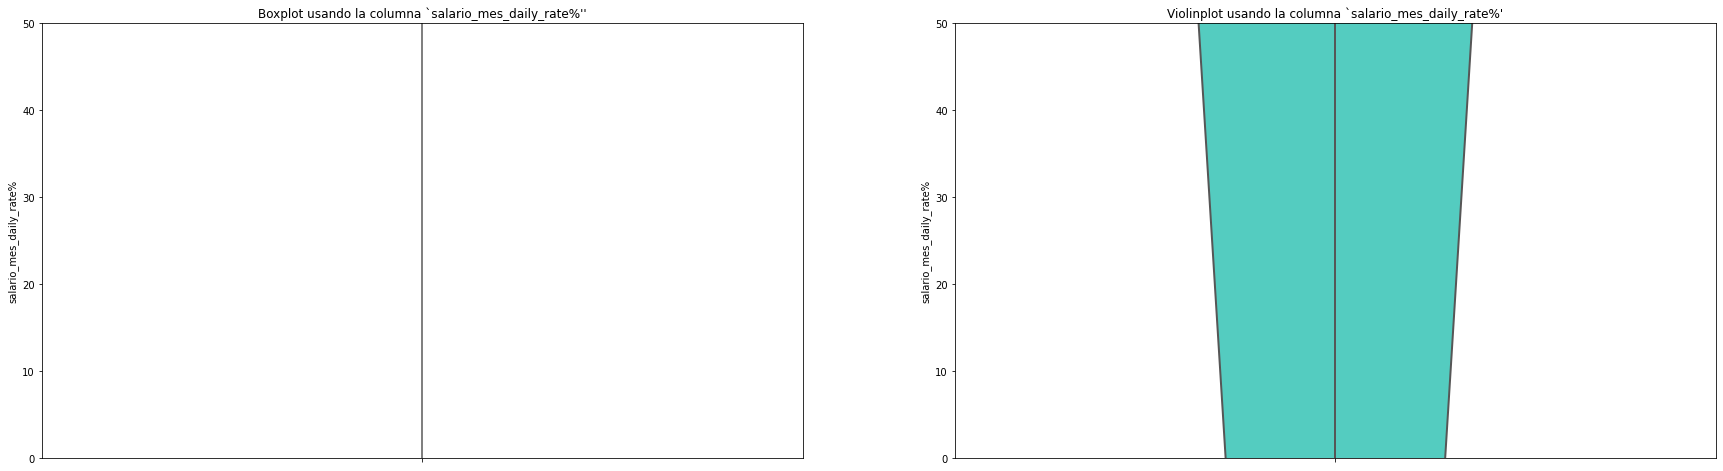

In [301]:
# empezamos creando el subplot con el número de gráficas deseadas en su interior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 8))

# añadimos un boxplot usando el método 'sns.boxplot()'
sns.boxplot(y = "salario_mes_daily_rate%", 
            data = datos_sueldo1, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("Boxplot usando la columna `salario_mes_daily_rate%''")


# CREAMOS EL VIOLINPLOT USANDO SEABORN
# añadimos un violinplot usando el método 'sns.violinplot()'. COMO ES SEABORN, USAMOS EL PARÁMETRO 'ax' PARA INDICAR EN QUE EJE DE LA FIGURA LO QUEREMOS 
sns.violinplot(y = "salario_mes_daily_rate%", 
               data = datos_sueldo1, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2, 
               ax = axes[1])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[1].set_title("Violinplot usando la columna `salario_mes_daily_rate%'")


# como ya sabemos que tenemos muchos outliers, vamos a usar el método '.set_ylim()' para "eliminar" los valores atípicos de la visualización
axes[0].set_ylim([0,50])
axes[1].set_ylim([0,50])